# Ansätze der Ausgangslösungen

In [24]:
V = 500e-3

c_ges = 0.03
c1_naoh = 0.5
print(f"Es werden {c_ges*V/c1_naoh *1e3} mL NaOH auf 500 mL verdünnt")

M_EE = 4 * 12.011 + 2* 15.999 + 8 * 1.008
dichte_EE = 0.902e3
print(f"Es werden {c_ges*V*M_EE/dichte_EE*1e3} mL EE auf 500 mL verdünnt") 


Es werden 30.0 mL NaOH auf 500 mL verdünnt
Es werden 1.4651773835920174 mL EE auf 500 mL verdünnt


# Titration der Natronlauge 

In [34]:
V_HCl = 15.0


V_NaOH = 50
c_HCl = 0.1 
print(f"Erwarteter Verbrauch an Maßlösung:{(V_NaOH * c_ges) / c_HCl}mL")
print(f"Konzentration der NaOH-Lösung:{(V_HCl * c_HCl) / V_NaOH}mol/L")

Erwarteter Verbrauch an Maßlösung:15.0mL
Konzentration der NaOH-Lösung:0.03mol/L


In [143]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
C = 1

#Messzeitpunte A:23° ,  B:28° ,  C:33°

ts_A = np.array( [
   0, 
    
    
]   )   

ts_B = np.array( [
    0
    
] )
ts_C = np.array( [
    0
    
] )


Ls_A = [0]
Ls_B = [0]
Ls_C = [0]            # gemessene Leitwerte           

Ks_A = np.array(Ls_A * C)
Ks_B = np.array(Ls_B * C)
Ks_C = np.array(Ls_C * C)

K0_A = 1
K0_B = 1
K0_C = 1

K_A_inf = 1
K_B_inf = 1
K_C_inf = 1

# Auswertung

k bei 23°C:nan
k bei 28°C:nan
k bei 33°C:nan


C:\Users\jesss\AppData\Local\Temp\ipykernel_7408\518741067.py:6: RuntimeWarning: divide by zero encountered in divide
  Y_Werte.append((Kappa_Messung - Kappa0) / Zeit_Messung)


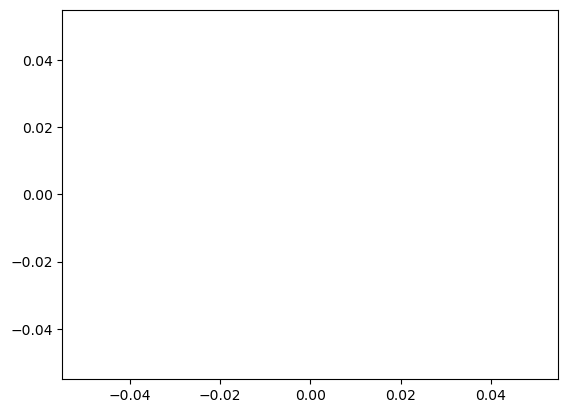

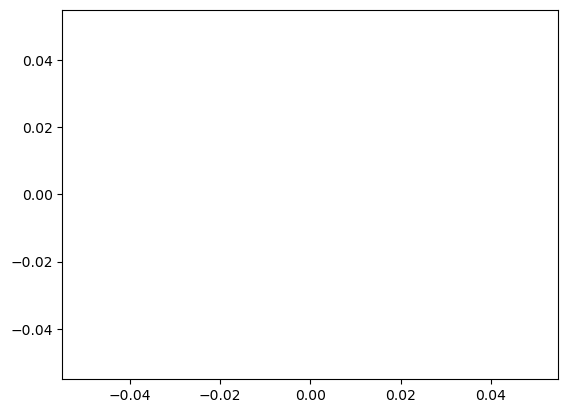

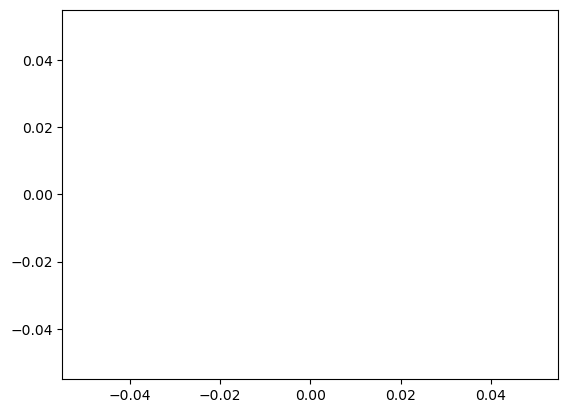

In [172]:
def Graph(Kappa0, Kappa_inf, Kappa_Messung, Zeit_Messung):
    X_Werte = []
    Y_Werte = []
    for i in range(len(Zeit_Messung)):
        X_Werte.append(Kappa_Messung - Kappa_inf)
        Y_Werte.append((Kappa_Messung - Kappa0) / Zeit_Messung)
    return [np.array(X_Werte), np.array(Y_Werte)]

colors = {
    23 : "b",
    28 : "g",
    33 : "r"
}

def Auswertung(K0, K_inf, Ks, ts, T):
    fig, ax = plt.subplots()
    Xs, Ys = Graph(K0, K_inf, Ks, ts)
    ax.scatter(Xs, Ys,c=colors[T])
    Fitwerte = linregress(Xs, Ys)
    ax.plot(Xs, Xs * Fitwerte.slope + Fitwerte.intercept, c = colors[T])
    k = Fitwerte.slope / (-1 * 0.5 * c_ges)
    print(f"k bei {T}°C:{k_A}")
    return k

k_A = Auswertung(K0_A, K_A_inf, Ks_A, ts_A, 23)
k_B = Auswertung(K0_B, K_B_inf, Ks_B, ts_B, 28)
k_C = Auswertung(K0_C, K_C_inf, Ks_C, ts_C, 33)


(nan, nan)


A,B,C
1,2,3
4,5,6


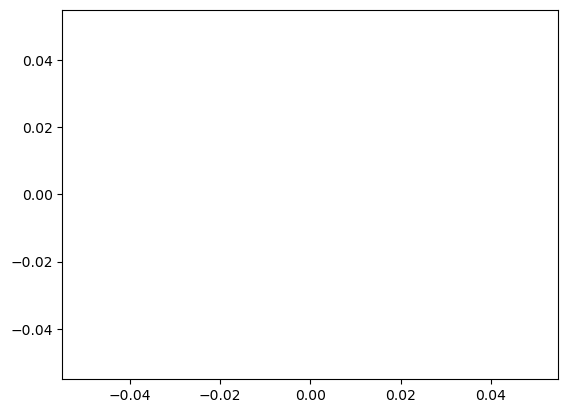

In [182]:
R = 8.31446

def Arrhenius(ks,Ts):
    fig,ax = plt.subplots()
    ax.scatter(1/Ts, np.log(ks))
    Fitwerte = linregress(1/Ts, np.log(ks))
    A = np.exp(Fitwerte.intercept)
    E_Akt = -1*R * Fitwerte.slope
    ax.plot(1/Ts, Fitwerte.intercept - Fitwerte.slope / 1/Ts, c = "red")
    return A, E_Akt

ks_arrPlot = np.array([k_A, k_B, k_C])
Ts_arrPlot = np.array([23, 28, 33])

print(Arrhenius(ks_arrPlot, Ts_arrPlot))

import tabulate

data = [[1,2,3],[4,5,6]]
tabulate.tabulate(data,headers=["A","B","C"],tablefmt="html")

# Arrhenius